<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Исследуем-качество-модели-до-изменений" data-toc-modified-id="Исследуем-качество-модели-до-изменений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследуем качество модели до изменений</a></span></li><li><span><a href="#Исследуем-качество-модели-после-изменений" data-toc-modified-id="Исследуем-качество-модели-после-изменений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследуем качество модели после изменений</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
data.shape

(5000, 5)

In [7]:
data.describe

<bound method NDFrame.describe of       Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0       1     41.0   49600.0            1                  0
1       0     46.0   38000.0            1                  1
2       0     29.0   21000.0            0                  0
3       0     21.0   41700.0            2                  0
4       1     28.0   26100.0            0                  0
...   ...      ...       ...          ...                ...
4995    0     28.0   35700.0            2                  0
4996    0     34.0   52400.0            1                  0
4997    0     20.0   33900.0            2                  0
4998    1     22.0   32700.0            3                  0
4999    1     28.0   40600.0            1                  0

[5000 rows x 5 columns]>

Проверим на дубликаты

In [8]:
data.duplicated().sum()

153

In [9]:
print('отношение дубликатов ко всем данным:', data.duplicated().sum()/len(data))

отношение дубликатов ко всем данным: 0.0306


количество дубликатов в данных составляет 3%, предлагаю оставить эти данных, так как возможно клиенты одного возраста, могут иметь одинаковую зарплату и состав семьи, так как данные обезличины, нет возможности проверить

рассмотрим данные более подробно с помощью графиков

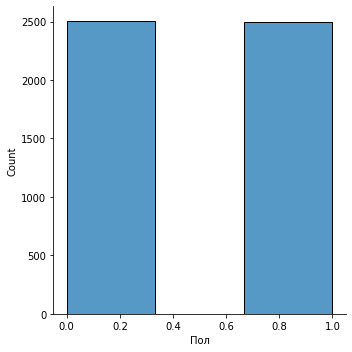

In [10]:
sns.displot(data['Пол'],kind='hist', bins = 3 );    

Количество мужчин и женщин примерно одинаково

для более четкого графика сначала найдем уникальные значения возрастов

In [11]:
len(data['Возраст'].unique())

46

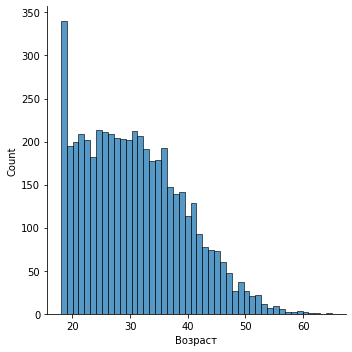

In [12]:
sns.displot(data['Возраст'],kind='hist', bins = 46); 

по графику видно что выделяются количество клиенты моложе 20 лет, после 35 лет клиенты идут на убыль

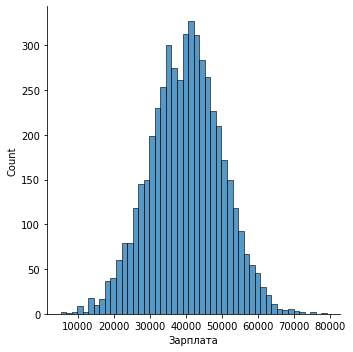

In [13]:
sns.displot(data['Зарплата'],kind='hist'); 

по графику видно что средняя зарплата клиентов примерно 45 тыс рублей.

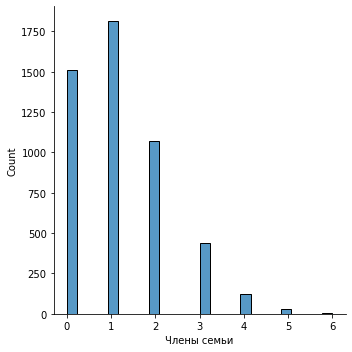

In [14]:
sns.displot(data['Члены семьи'],kind='hist'); 

Большинство клиентов либо проживают одни, либо имеют одного или двух членов семьи

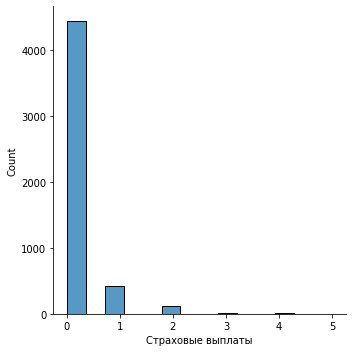

In [15]:
sns.displot(data['Страховые выплаты'],kind='hist'); 

Большинство клиентов не обращалось за страховыми выплатами

Вывод:
Загрузив и изучив данные мы узнали:
- данные состоят из 5 столбцов и 5000 строк
- данные содержат признаки клиентов: пол, возраст, доход, члены семьи и страховые выплаты
- в данных были обнаружены 3% дубликатов, дубликаты не стал удалять, так как они безличные и могут совпадать
- пропусков не обнаружно
- так же было выяснинено что мужчин и женщин примерно одинаковое количество, средняя зарплата 45 тыс. рублей, клиентов старше 35 лет становится меньше. большинство не обращалось за страховыми выплатами.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** качество линейной регрессии не изменится

**Обоснование:** 
В решении нам понадобится использовать правила работы с матрицами:

$$
(AB)C=A(BC)
$$

$$
(AB)^T = B^T * A^T
$$

$$
(AB)^{-1} = B^{-1} * A^{-1}
$$

$$
AA^{-1} = A^{-1}*A = E
$$

Чтобы предсказания были равны до и после преоразования докажем

$$
a = Xw = Xp*wp=XPwp=ap
$$

для этого нужно чтобы

$$
wp = P^{-1}w
$$

Умножим матрицу X на матрицу P(обратимую): wp - вектор весов после преоразования
$$
wp = ((X*P)^T XP)^{-1} (XP)^T y
$$

с помощью правил умножим значения внутри скобок

$$
wp = (P^TX^TXP)^{-1} P^TX^Ty
$$

Сгруппируем

$$ 
wp = ((P^TX^T)(XP))^{-1} P^TX^Ty
$$

расскроем первые скобки
$$
wp = (XP)^{-1} (P^TX^T)^{-1} P^TX^Ty
$$

$$
wp = P^{-1} X^{-1} X^{T-1} P^{T-1} P^TX^Ty
$$

в формуле получилась единичная матрица Е, можем ее сократить
$$
E = P^{T-1} P^T
$$

$$
wp = P^{-1}X^{-1}X^{T-1}X^Ty
$$

$$
wp = P^{-1}(X^TX)^{-1}X^Ty
$$

так как 
$$
w = (X^T X)^{-1} X^T y
$$

получим 
$$
wp = P^{-1}w
$$

что и требовалось доказать 

$$
wp / w= P^{-1}
$$

## Алгоритм преобразования

**Алгоритм**
Для защиты данных мы домножим их на случайную обратную матрицу, 
- 1) Разделим данные на две выборки: Обучающую и тестовую
- 2) С помощью линейной регресии обучим модель до преоразования
- 3) Вычислим коэффициент R2
- 4) Для преобразования создадим случайную матрицу, проверим ее на обратимость.
- 5) умножим данную матрицу на обучающую и тестовую выборку
- 6) обучим с помощью линейной регрессии преобразованную модель
- 7) Вычислим коэффициент R2 после преобразования
- 8) Сравним коэффициенты R2 до и после преобразования. ( Они должны быть равны)

**Обоснование**

Так как во второй части выяснили что при умножении признаков из тренировочной и тестовой выборки на случайную обратимую матрицу, качество модели не изменится


## Проверка алгоритма

### Исследуем качество модели до изменений

Выделим признаки и целевые признаки
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

In [16]:
features = data.drop('Страховые выплаты',axis=1)

In [17]:
target = data['Страховые выплаты']

Разобьем данные на обучающую и тестовую выборку, 75% и 25%

In [18]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

Обучим модель линейной регрессии

In [19]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_d = model.predict(features_test)
R2d = r2_score(target_test, model.predict(features_test))
MSEd = mean_squared_error(predicted_d,target_test)

вычислим коэффициент R2 для модели до изменений

In [20]:
print("R2 до преобразования", R2d)

R2 до преобразования 0.43522757127026546


In [21]:
print('MSE до преобразования', MSEd)

MSE до преобразования 0.11660517472525592


### Исследуем качество модели после изменений

Изменим признаки исходной матрицы данных. Для этого воспользуемся методом умножения их на произвольную обратимую матрицу

Создадим рандомную обратимую матрицу 4 на 4 по количеству признаков основной матрицы:

In [22]:
print(features_train.shape)
print(features_test.shape)

(3750, 4)
(1250, 4)


In [23]:
random_matrix = np.random.randn(4, 4)

In [24]:
random_matrix

array([[ 0.40928982,  1.98561597, -1.12728941,  0.44233011],
       [ 1.26111333,  0.63830391, -0.34781327, -0.37837636],
       [ 0.46782007,  1.96600562, -0.24320226,  0.15383817],
       [-1.73135423,  0.14283251, -1.33317859, -1.93746583]])

Проверим получившеюся матрицу на обратимость. Для этого умножим её на обратную ей матрицу. округлим значения.

In [25]:
np.round(random_matrix @ np.linalg.inv(random_matrix))

array([[ 1., -0., -0.,  0.],
       [ 0.,  1., -0., -0.],
       [-0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  1.]])

в результате получилась единичная матрица. это означет что рандомная матрица обратима.

Далее перемножим тестовую и тренировочную матрицы на получившуюся рандомную обратимую матрицу:

In [26]:
matrix_features_train = features_train.dot(random_matrix)
matrix_features_test = features_test.dot(random_matrix)

Обучим новую модель

In [27]:
model.fit(matrix_features_train, target_train)
predicted_p = model.predict(matrix_features_test)
R2p = model.score(matrix_features_test, target_test)
MSEp = mean_squared_error(predicted_p,target_test)

In [28]:
print('R2 после преобразования: ', R2p)

R2 после преобразования:  0.43522757127009315


In [29]:
print('MSE после преобразования:', MSEp)

MSE после преобразования: 0.11660517472529147


In [30]:
print('Соотношение качества модели до преобразования к преобразованию равна:', R2d/R2p)

Соотношение качества модели до преобразования к преобразованию равна: 1.000000000000396


## Вывод:

В данной работе нам нужно было защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель от нас не требовалось.

Преобразовать данные нужно было так, что бы результаты качества моделей машинного обучения не изменились и не ухудшились.

В данной работе мы сначала заругили и изучили данные, разработали алгоритм по которому были преобразованны данные.
Методом преобразования был выбран метод умножения признаков исходных данных на обратимую матрицу.

В результате проверки алгоритма качества модели до преобразования и после преобразования равны.
что и требовалось сделать в данной работе 